# #QuarentenaDados

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.rcParams['figure.figsize'] = 12,6

## Reading [IMDB](https://www.imdb.com/) data from [Kaggle](https://www.kaggle.com/adnanr94/imdb-movies-metadata)

In [2]:
file = os.path.abspath('../Files/movie_metadata.csv')
imdb = pd.read_csv(file)
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## Desafio 1  by [Thiago Gonçalves](https://twitter.com/tgcsantos)

Plot and analyze the average Boxplot (column imbd_score) of the black and white and color films.

In [3]:
color_or_bw = imdb.query("color in ['Color', ' Black and White']")
color_or_bw["color_bool"] = (color_or_bw["color"] == "Color")*1
color_or_bw["color_bool"].value_counts()

1    4815
0     209
Name: color_bool, dtype: int64

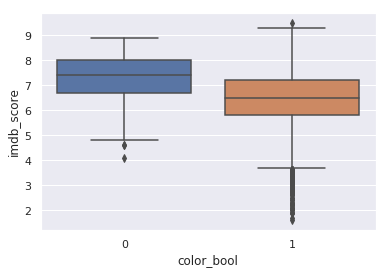

In [4]:
sns.boxplot(data=color_or_bw[["color_bool", "imdb_score"]], x='color_bool', y='imdb_score')
plt.show()

## Desafio 2 by [Guilherme Silveira](https://www.linkedin.com/in/guilhermeazevedosilveira/)

In the budget for profit graph we have a point with a lot of cost and loss, find out what this film is (budget close to 2.5).

In [5]:
imdb = imdb.drop_duplicates()
imdb_usa = imdb.query("country == 'USA'")

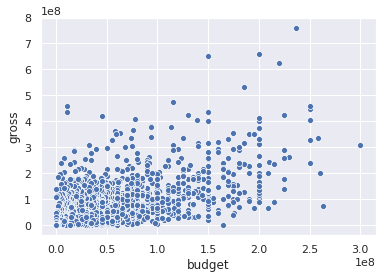

In [6]:
budget_gross = imdb_usa[["budget", "gross"]].query("budget >0 | gross > 0")

sns.scatterplot(x="budget", y="gross", data = budget_gross)
plt.show()

In [7]:
imdb_usa['profit'] = imdb_usa['gross'] - imdb_usa['budget']
imdb_usa.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,78530303.0


In [8]:
imdb_usa.sort_values('profit').head(3)['movie_title']

5           John Carter 
91    The Polar Express 
28           Battleship 
Name: movie_title, dtype: object

## Desafio 3 by [Guilherme Silveira](https://www.linkedin.com/in/guilhermeazevedosilveira/)

In class we said that perhaps, more recent films may have a loss because they have not yet had time to recover their investment. Review this information and tell us what your conclusions were.

In [9]:
imdb_usa.dropna().query("budget > 0 | gross > 0").sort_values("title_year", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
264,Color,Robert Schwentke,181.0,120.0,124.0,943.0,Theo James,6000.0,66002193.0,Action|Adventure|Mystery|Sci-Fi|Thriller,...,English,USA,PG-13,110000000.0,2016.0,5000.0,5.8,2.35,12000,-43997807.0
154,Color,Alessandro Carloni,210.0,95.0,5.0,967.0,Angelina Jolie Pitt,24000.0,143523463.0,Action|Adventure|Animation|Comedy|Family,...,English,USA,PG,145000000.0,2016.0,11000.0,7.2,2.35,24000,-1476537.0
380,Color,Jon M. Chu,196.0,129.0,209.0,886.0,Morgan Freeman,11000.0,64685359.0,Action|Adventure|Comedy|Crime|Mystery|Thriller,...,English,USA,PG-13,90000000.0,2016.0,11000.0,6.9,2.35,15000,-25314641.0
1376,Color,Christian Ditter,148.0,110.0,11.0,591.0,Damon Wayans Jr.,2000.0,46813366.0,Comedy|Romance,...,English,USA,R,38000000.0,2016.0,756.0,6.1,2.35,15000,8813366.0
150,Color,Paul Feig,464.0,116.0,176.0,322.0,Kate McKinnon,783.0,118099659.0,Action|Comedy|Fantasy|Sci-Fi,...,English,USA,PG-13,144000000.0,2016.0,370.0,5.5,2.35,62000,-25900341.0


In [10]:
year_analysis = imdb_usa[["movie_title", "title_year", "profit"]]
year_analysis.head()

,movie_title,title_year,profit
0,Avatar,2009.0,523505847.0
1,Pirates of the Caribbean: At World's End,2007.0,9404152.0
3,The Dark Knight Rises,2012.0,198130642.0
5,John Carter,2012.0,-190641321.0
6,Spider-Man 3,2007.0,78530303.0


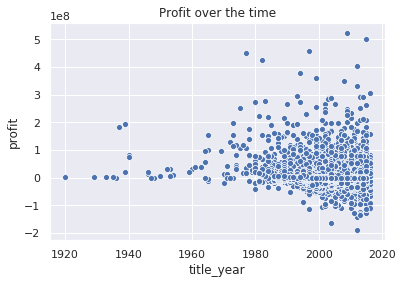

In [11]:
sns.scatterplot(x="title_year", y="profit", data = year_analysis)
plt.title('Profit over the time')
plt.show()

## Profit over the time

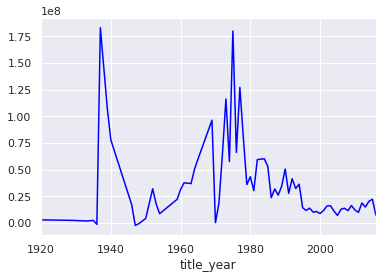

In [12]:
display(Markdown('## Profit over the time'))

nota_media_por_ano = year_analysis.dropna().groupby('title_year')['profit'].mean()
nota_media_por_ano.plot(color='blue')

plt.show()

## Desafio 4 by [Paulo Silveira](https://twitter.com/paulo_caelum)

What were the films of the pre-World War II that had a lot of profit.

In [13]:
pre_war = imdb_usa.dropna().query("title_year > 1920 & title_year <= 1939")
pre_war[['movie_title', 'profit']].head()

,movie_title,profit
3970,Gone with the Wind,194678278.0
4157,The Wizard of Oz,19402612.0
4427,Modern Times,-1336755.0
4449,Snow White and the Seven Dwarfs,182925485.0
4706,Top Hat,2391000.0


## Desafio 5 [Paulo Silveira](https://twitter.com/paulo_caelum)

In the graph of filmes_irmaos por dindin we have some strange points between 15 and 20. Confirm Paulo's brilliant thesis that the strange citizen is Woody Allen. (If he is wrong he can bug in the social networks kkkkk)

In [14]:
director_movies = imdb_usa['director_name'].value_counts()
director_movies_gross = imdb_usa[['director_name', 'gross']].set_index('director_name').join(director_movies, on='director_name')
director_movies_gross.columns = ['money_gross', 'no_movies']
director_movies_gross = director_movies_gross.reset_index()
director_movies_gross.head()

,director_name,money_gross,no_movies
0,James Cameron,760505847.0,6.0
1,Gore Verbinski,309404152.0,7.0
2,Christopher Nolan,448130642.0,8.0
3,Andrew Stanton,73058679.0,3.0
4,Sam Raimi,336530303.0,11.0


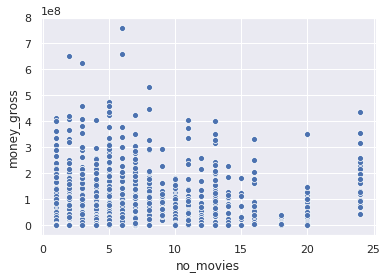

In [15]:
sns.scatterplot(x='no_movies', y='money_gross', data=director_movies_gross)
plt.show()

In [16]:
director_movies_gross.query("no_movies > 15 & no_movies < 20")

,director_name,money_gross,no_movies
26,Tim Burton,334185206.0,16.0
103,Tim Burton,206456431.0,16.0
117,Tim Burton,79711678.0,16.0
243,Tim Burton,180011740.0,16.0
379,Tim Burton,162831698.0,16.0
425,Tim Burton,37754208.0,16.0
523,Tim Burton,66257002.0,16.0
813,Spike Lee,88504640.0,16.0
960,Spike Lee,7916887.0,16.0
1121,Tim Burton,35287788.0,16.0


In [17]:
director_movies_gross.query("no_movies > 15 & no_movies < 20").query("money_gross == 'nan'")

,director_name,money_gross,no_movies
3189,Woody Allen,NaN,18.0
3191,Woody Allen,NaN,18.0
3232,Woody Allen,NaN,18.0
3346,Spike Lee,NaN,16.0


## Desafio 6 by [Thiago Gonçalves](https://twitter.com/tgcsantos)

Analyze the pairplot chart in more detail, spend time thinking and trying to understand the charts.

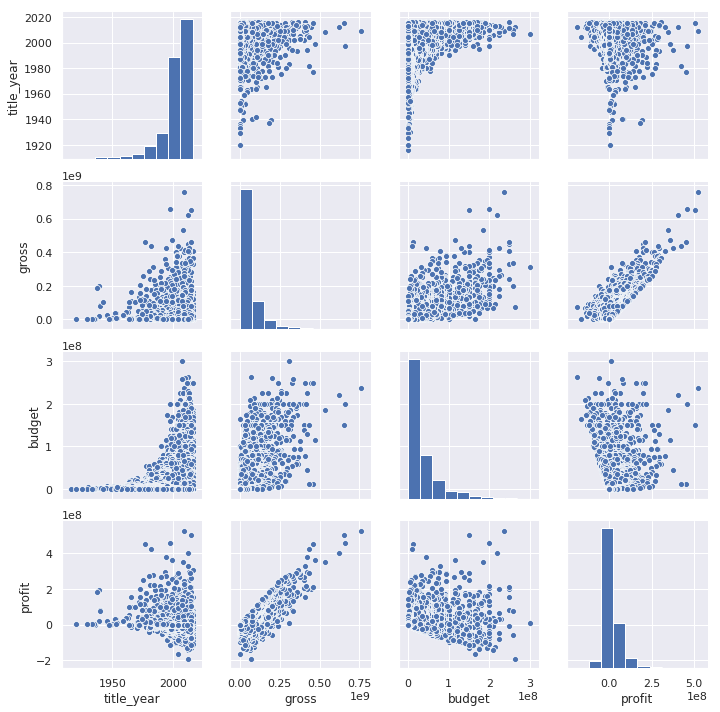

In [18]:
sns.pairplot(data = imdb_usa[["title_year", "gross", "budget", "profit"]])
plt.show()

## Desafio 7 by [Thiago Gonçalves](https://twitter.com/tgcsantos)

Calculate the correlation only of post-2000 films (Throwing away films before 2000) and interpret this correlation.

In [19]:
imdb_usa[["title_year", "gross", "budget", "profit"]].query("title_year >= 2000").sort_values("title_year", ascending=True).head()

,title_year,gross,budget,profit
3093,2000.0,68353550.0,10000000.0,58353550.0
283,2000.0,187670866.0,103000000.0,84670866.0
282,2000.0,101643008.0,90000000.0,11643008.0
1252,2000.0,37752931.0,40000000.0,-2247069.0
3050,2000.0,13592872.0,11000000.0,2592872.0


In [20]:
imdb_usa[["title_year", "gross", "budget", "profit"]].query("title_year >= 2000").corr()

,title_year,gross,budget,profit
title_year,1.000000,0.105342,0.058550,0.035039
gross,0.105342,1.000000,0.709233,0.770642
budget,0.058550,0.709233,1.000000,0.097307
profit,0.035039,0.770642,0.097307,1.000000


## Desafio 8 by [Allan Spadini](https://twitter.com/allanspadini)

Trying to find a line, it can be with a ruler on the monitor (don't do it), with excel / google sheets, with python, on the graph that seems to be approaching with a line (for example budget / profit, gross / profit)

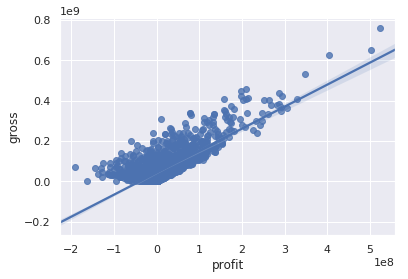

In [21]:
sns.regplot(x=imdb_usa.query("title_year >= 2000")['profit'], y=imdb_usa.query("title_year >= 2000")['gross'], data=imdb_usa)
plt.show()

## Desafio 9 by [Thais André](https://twitter.com/thais_tandre)


Analyze and interpret the correlation of variables other than those made in the classroom (notes is a good one). Number of reviews per year can also be a feature.

In [22]:
imdb_usa[["title_year", "gross", "budget", "profit", "num_voted_users"]].corr()

,title_year,gross,budget,profit,num_voted_users
title_year,1.000000,0.034827,0.229453,-0.123035,0.025617
gross,0.034827,1.000000,0.645673,0.797037,0.640387
budget,0.229453,0.645673,1.000000,0.053455,0.430993
profit,-0.123035,0.797037,0.053455,1.000000,0.508717
num_voted_users,0.025617,0.640387,0.430993,0.508717,1.000000


In [23]:
imdb_usa[["num_user_for_reviews", "num_critic_for_reviews", "num_voted_users", "imdb_score"]].corr()

,num_user_for_reviews,num_critic_for_reviews,num_voted_users,imdb_score
num_user_for_reviews,1.000000,0.611119,0.797354,0.320336
num_critic_for_reviews,0.611119,1.000000,0.621889,0.320960
num_voted_users,0.797354,0.621889,1.000000,0.447340
imdb_score,0.320336,0.320960,0.447340,1.000000
